In [253]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates

In [279]:

def buscar_dados_diarios():
   
    # dados_diarios = pd.read_csv('df_dia.csv')

    now = datetime.now()
    dia_hoje = now.day
    dia_anterior = now - timedelta(days=1)
    data_anterior_formatada = dia_anterior.strftime("%Y-%m-%d")
    dia_anterior = dia_hoje - 1    
    data_format = now.strftime("%Y-%m-%d")
    hora_minuto = now.strftime("%H:%M")


    # dados_diarios = dados_diarios.loc[dados_diarios['day'] == dia_hoje,:]
        
    brasil_tickers =  ['ABEV3.SA', 'ALPA4.SA',  'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA','BRAP4.SA',
                       'BRFS3.SA', 'BRKM5.SA',  'CASH3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CRFB3.SA', 'CSAN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA',
                       'EGIE3.SA', 'ELET3.SA',  'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA','EQTL3.SA', 'EZTC3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA',
                       'IGTI11.SA','IRBR3.SA',  'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA','LREN3.SA', 'MGLU3.SA', 'MRFG3.SA','MRVE3.SA', 'MULT3.SA',
                       'NTCO3.SA', 'HYPE3.SA',  'PETR3.SA', 'PETR4.SA', 'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA' ,'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
                       'SAPR4.SA', 'SAPR11.SA', 'SUZB3.SA', 'TAEE11.SA','TRPL4.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA','VALE3.SA', 'BRBI11.SA', 'RAIZ4.SA', 'RANI3.SA'] # defina aqui os tickers

    
    for acao in brasil_tickers:
        caminho = 'dados_brutos/dados_'+ acao +'.csv'

        # Função para baixar dados do ticker selecionado com intervalo de 5 minutos
        def baixar_dados(ticker, start_date):
            data = yf.download(
                tickers=ticker,            
                start=start_date,           
                interval="5m"                                  
            )
            # start: Data de início no formato YYYY-MM-DD.
            # interval: Frequência dos dados (opções: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo).
            return data

        dados_diarios = baixar_dados(acao, data_anterior_formatada)
        dados_diarios['variacao'] = dados_diarios['Close'].pct_change()     
        dados_diarios['variacao'] = dados_diarios['variacao'].apply(lambda x: round(x * 100, 4))
        dados_diarios['variacao'] = (1 + dados_diarios['variacao']).cumprod() - 1
        dados_diarios = dados_diarios.loc[:,['Close', 'Volume', 'variacao']]
        
        dados_diarios.to_csv(caminho)
        
    # Criando lista de arquivos CSV
    caminho_dos_arquivos = 'dados_brutos/*.csv' 
    arquivos_csv = glob.glob(caminho_dos_arquivos)

    dfs = []

    # Loop para ler e processar cada arquivo CSV
    for arquivo in arquivos_csv:

        df = pd.read_csv(arquivo)
        
        nome_acao = arquivo.split('_')[-1].replace('.SA.csv', '')
        df['acao'] = nome_acao
        
        dfs.append(df)

    # Concatenar dataframes
    resultado = pd.concat(dfs, ignore_index=True)
    resultado['Datetime'] = pd.to_datetime(resultado['Datetime'])
    resultado['day'] = resultado['Datetime'].dt.day

    resultado.to_csv('df_dia.csv', index=False)

    if resultado['day'].min() != dia_hoje:
         dados_dia_anterior = resultado.loc[resultado['day'] == dia_anterior,:]
         dados_dia_anterior.to_csv('df_dia_anterior.csv')
         resultado = resultado.loc[resultado['day'] == dia_hoje,:]
         resultado.to_csv('df_dia.csv', index=False)


buscar_dados_diarios()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Criação da coluna de horas e minutos e gráfico 

In [280]:
df = pd.read_csv('df_dia.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['horas'] = df['Datetime'].apply(lambda x: x.strftime("%H:%M"))

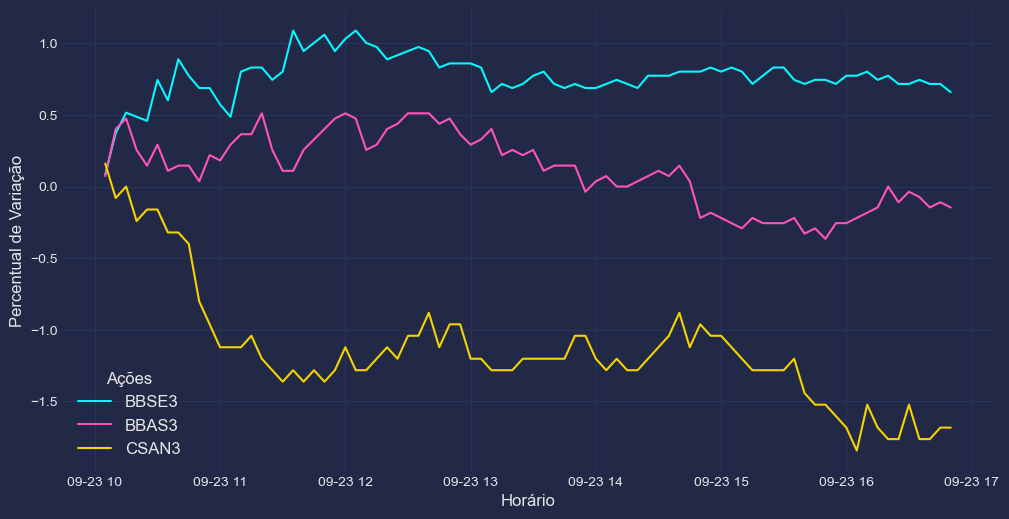

In [287]:
import mplcyberpunk as mp
plt.style.use("cyberpunk")
tam_leg = 12
plt.figure(figsize = (tam_leg,tam_leg/2))

lista_acoes = ['BBSE3', 'BBAS3', 'CSAN3']#, 'SAPR4', 'BRBI11']
for acao in lista_acoes:
    df_test =df.loc[df['acao']==acao,:].copy()
    df_test['variacao'] = df_test['Close'].pct_change() 
    df_test['variacao'] = (1 + df_test['variacao']).cumprod() - 1
    df_test['variacao'] = df_test['variacao'].apply(lambda x: round(x * 100, 5))

    df_test.dropna()
    plt.plot(df_test['Datetime'], df_test['variacao'])
# plt.title( )
plt.xlabel('Horário',fontsize=tam_leg )
plt.ylabel('Percentual de Variação',fontsize=tam_leg)
plt.legend(lista_acoes, title = 'Ações', fontsize=tam_leg, title_fontsize=tam_leg);

# plt.savefig('comparação_de_acoes.png')


In [274]:
px.line(df.loc[df['acao']=='BBSE3',:], x= 'Datetime', y= 'Close', title='Raizen')

In [113]:
df['horas'] = df['Datetime'].apply(lambda x: x.strftime("%H:%M"))

df.dtypes

Unnamed: 0                        int64
Datetime      datetime64[ns, UTC-03:00]
Close                           float64
Volume                            int64
acao                             object
day                               int64
horas                            object
dtype: object

In [109]:
df['horas'] = pd.to_datetime(df['horas'])
df.dtypes


Unnamed: 0                        int64
Datetime      datetime64[ns, UTC-03:00]
Close                           float64
Volume                            int64
acao                             object
day                               int64
horas                    datetime64[ns]
dtype: object